# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


## Import Functions

### dslabs_functions

In [2]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [3]:
%run "scripts/data_functions.py"


dslabs_functions lodaded
data_functions lodaded


# Load

In [4]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_data_prep_encoded.csv'


file_tag = 'Citi Bike'

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

In [5]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

#id_cols=['ride_id','start_time', 'end_time','start_station','end_station','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','wmo_weather_code','snowfall_cm','ride_duration_sec']
##remove also col = 'snowfall_cm' because it has only 0 values in our dataset
##remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow
#
#df=df.drop(columns=id_cols, axis=1)

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 39 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   bike_type                           int64  
 1   user_type                           int64  
 2   day_of_month                        int64  
 3   is_weekend                          int64  
 4   ride_duration_min                   float64
 5   temperature_2m                      float64
 6   rain_mm                             float64
 7   cloud_cover_low_pct                 int64  
 8   wind_speed_10m                      float64
 9   ride_distance_km                    float64
 10  ride_avg_speed                      float64
 11  time_of_day_sin                     float64
 12  time_of_day_cos                     float64
 13  day_of_week_sin                     float64
 14  day_of_week_cos                     float64
 15  hour_sin                            float64
 16  

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
0,1,1,27,1,9.161483,14.3,0.0,16,25.3,2.037884,...,0,0,0,0,0,0,1,0,0,0
1,1,1,25,0,4.639433,11.2,0.0,0,13.7,1.447460,...,0,1,0,0,0,0,0,0,0,0
2,1,1,6,1,6.865817,9.6,0.0,95,27.9,1.785276,...,0,0,0,0,0,0,1,0,0,0
3,1,1,6,1,2.289150,10.7,0.0,11,25.4,0.431973,...,0,0,0,0,0,0,1,0,0,0
4,1,1,10,0,7.947850,15.0,0.0,44,10.7,1.376807,...,0,0,0,0,0,0,0,1,0,0
5,1,1,7,1,27.290533,13.4,0.0,0,22.3,2.404062,...,0,0,0,0,0,0,1,0,0,0
6,1,1,25,0,10.656417,7.9,0.0,0,15.4,2.072039,...,0,1,0,0,0,0,0,0,0,0
7,1,1,14,1,23.607000,20.8,0.0,0,21.3,4.927812,...,0,0,0,0,0,0,1,0,0,0
8,1,1,17,0,10.698533,15.4,0.0,79,18.2,2.572462,...,0,0,0,0,0,0,1,0,0,0
9,1,1,26,0,7.501383,10.4,0.0,0,4.4,1.758236,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
bike_type                                   2
user_type                                   2
day_of_month                               31
is_weekend                                  2
ride_duration_min                     1410275
temperature_2m                            214
rain_mm                                    30
cloud_cover_low_pct                        73
wind_speed_10m                            258
ride_distance_km                      2194836
ride_avg_speed                        3159469
time_of_day_sin                             6
time_of_day_cos                             5
day_of_week_sin                             7
day_of_week_cos                             7
hour_sin                                   13
hour_cos                                   13
start_borough_Bronx                         2
start_borough_Brooklyn                      2
start_borough_Jersey City 

In [8]:
display(df.head(10))

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
0,1,1,27,1,9.161483,14.3,0.0,16,25.3,2.037884,...,0,0,0,0,0,0,1,0,0,0
1,1,1,25,0,4.639433,11.2,0.0,0,13.7,1.447460,...,0,1,0,0,0,0,0,0,0,0
2,1,1,6,1,6.865817,9.6,0.0,95,27.9,1.785276,...,0,0,0,0,0,0,1,0,0,0
3,1,1,6,1,2.289150,10.7,0.0,11,25.4,0.431973,...,0,0,0,0,0,0,1,0,0,0
4,1,1,10,0,7.947850,15.0,0.0,44,10.7,1.376807,...,0,0,0,0,0,0,0,1,0,0
5,1,1,7,1,27.290533,13.4,0.0,0,22.3,2.404062,...,0,0,0,0,0,0,1,0,0,0
6,1,1,25,0,10.656417,7.9,0.0,0,15.4,2.072039,...,0,1,0,0,0,0,0,0,0,0
7,1,1,14,1,23.607000,20.8,0.0,0,21.3,4.927812,...,0,0,0,0,0,0,1,0,0,0
8,1,1,17,0,10.698533,15.4,0.0,79,18.2,2.572462,...,0,0,0,0,0,0,1,0,0,0
9,1,1,26,0,7.501383,10.4,0.0,0,4.4,1.758236,...,0,1,0,0,0,0,0,0,0,0


In [9]:
df.describe()

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
count,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,...,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06,3.193597e+06
mean,6.546117e-01,8.149425e-01,1.666269e+01,2.703607e-01,1.301825e+01,1.308878e+01,7.936017e-02,1.996614e+01,1.541539e+01,2.006798e+00,...,3.438129e-04,2.726831e-01,4.345570e-03,7.703320e-02,3.060154e-02,9.450190e-02,4.280193e-01,7.468319e-02,3.538956e-03,1.459326e-02
std,4.754948e-01,3.883442e-01,8.266573e+00,4.441462e-01,2.072067e+01,5.268971e+00,3.641502e-01,3.483365e+01,7.214514e+00,1.751503e+00,...,1.853901e-02,4.453393e-01,6.577756e-02,2.666442e-01,1.722356e-01,2.925258e-01,4.947917e-01,2.628795e-01,5.938378e-02,1.199179e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.001633e+00,6.000000e-01,0.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,5.165117e+00,9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,8.398004e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00,8.971517e+00,1.250000e+01,0.000000e+00,0.000000e+00,1.490000e+01,1.487608e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,2.400000e+01,1.000000e+00,1.572447e+01,1.710000e+01,0.000000e+00,2.000000e+01,2.020000e+01,2.611806e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,1.494622e+03,2.810000e+01,6.400000e+00,1.000000e+02,3.980000e+01,2.561379e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [14]:

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

def apply_standard_scaler(df: DataFrame) -> DataFrame:

    df_copy = df.copy()
    
    # Apply scaling to all the feature columns (since there is no target)
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_zscore

In [15]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy)

    return df_zscore

df_1=apply_strategy_1(df)

df_1.columns

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm

In [16]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 39 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   bike_type                           float64
 1   user_type                           float64
 2   day_of_month                        float64
 3   is_weekend                          float64
 4   ride_duration_min                   float64
 5   temperature_2m                      float64
 6   rain_mm                             float64
 7   cloud_cover_low_pct                 float64
 8   wind_speed_10m                      float64
 9   ride_distance_km                    float64
 10  ride_avg_speed                      float64
 11  time_of_day_sin                     float64
 12  time_of_day_cos                     float64
 13  day_of_week_sin                     float64
 14  day_of_week_cos                     float64
 15  hour_sin                            float64
 16  

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [21]:
from sklearn.preprocessing import MinMaxScaler

def apply_min_max_scaler(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
        # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_minmax

In [22]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm

# scaling plot - visualize oth streategies

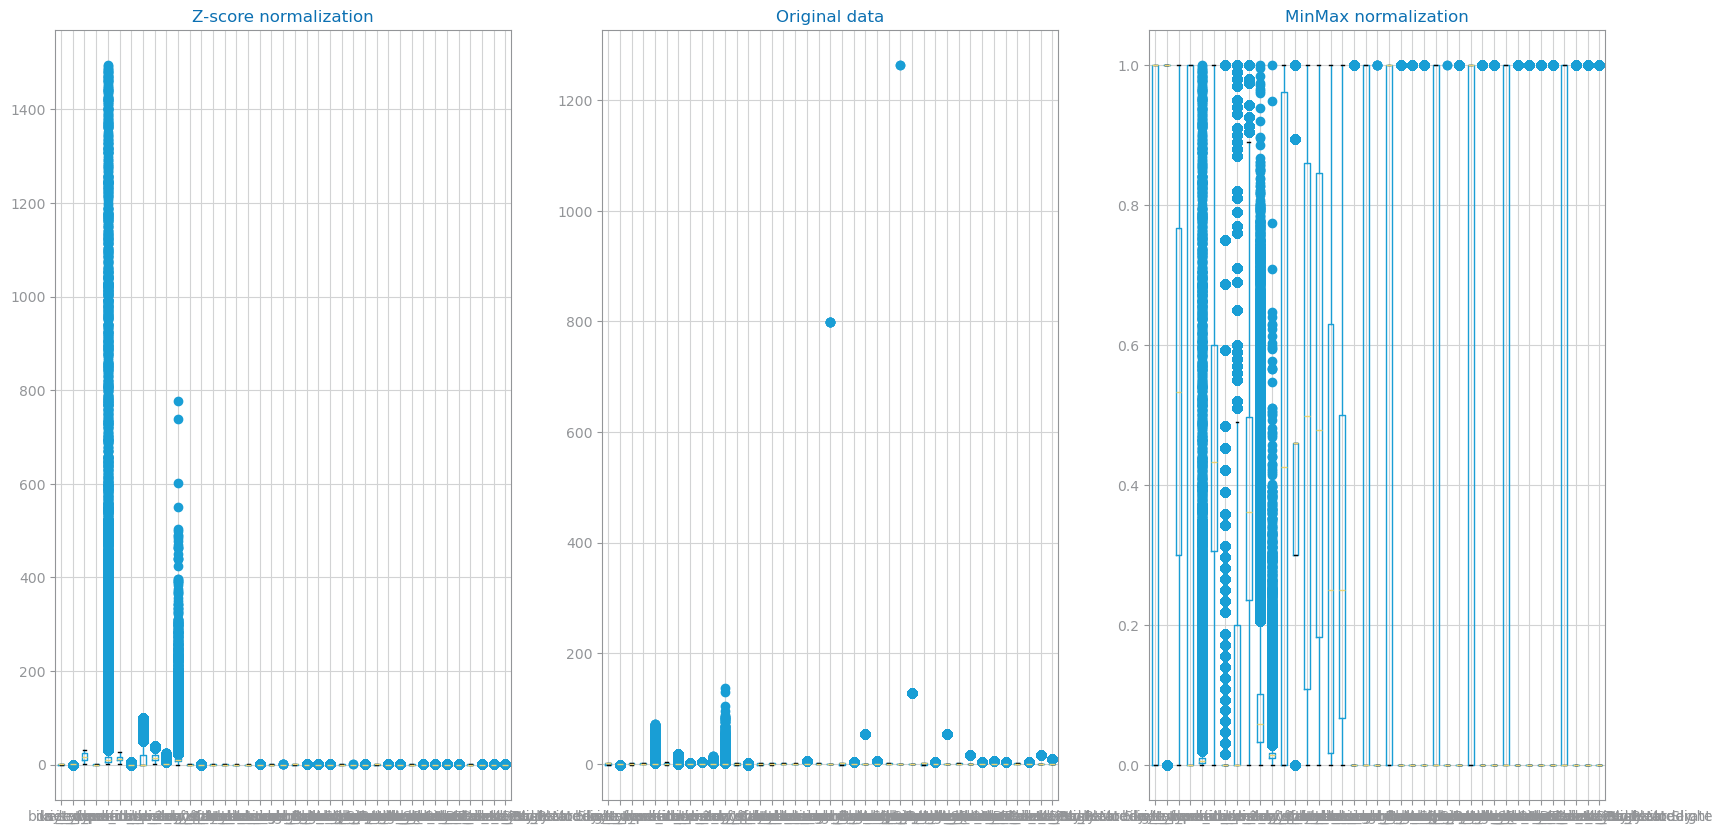

In [23]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
df.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_1.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_2.boxplot(ax=axs[0, 2])
show()

# Analysis

Comparing Scalling approaches:
- In Scalling treatment, let's go with approach 1 as it's more suitable to clustering techniques (also assuming that our numeric variables have normalized distribuition)

# save to csv

In [24]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/citi_bike_data_prep_scaling.csv", index=False)
    

    print(data_save.columns)

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm